In [516]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.integrate import quad, odeint

# Question 1

In [493]:
k = np.arange(1, 12 + 1)
m = np.power(2, k)

def f(x):
	return 1 / np.sqrt(x)

In [494]:
a, b = 1, 2
def compute_I(f, a, b, m):
	h_list = (b - a) / m

	I = []
	errors = []
	for h in h_list:
		t = np.arange(a, b, h)
		y = np.array([3 / 4 * h * f(t[i] + h/3) + h/4 * f(t[i] + h) for i in range(len(t))])

		sol_exact = quad(f, a, b)[0]
		print(f"sol_exact = {sol_exact}")
		errors.append(np.max(np.power(np.abs(y - sol_exact), 2)))
		I.append(np.sum(y))
	return I, h_list,errors

sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
sol_exact = 0.8284271247461902
I1 = [0.8281067086445473, 0.8283842224576623, 0.8284216302273131, 0.8284264316763478, 0.8284270377897814, 0.8284271138586767, 0.828427123384198, 0.8284271245758775, 0.8284271247248971, 0.8284271247435282, 0.8284271247458573, 0.8284271247461485]


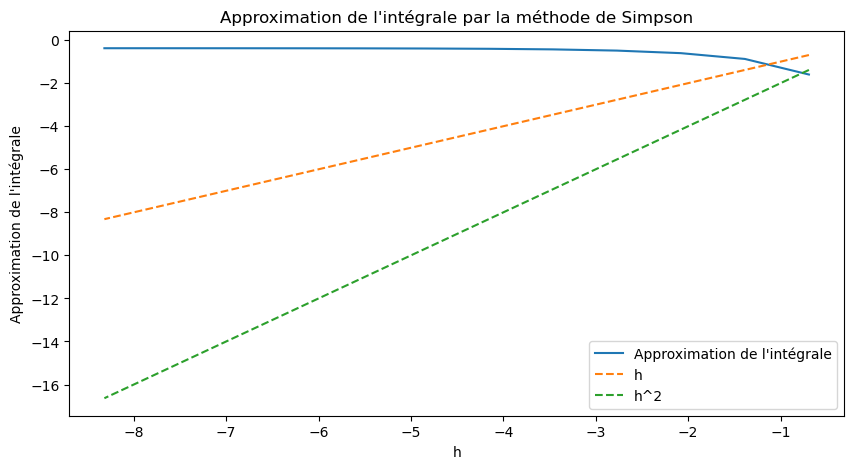

In [495]:
I1, h_list, errors1 = compute_I(f, a, b, m)

print(f"I1 = {I1}")

plt.figure(figsize=(10, 5))
plt.plot(np.log(h_list), np.log(errors1), label='Approximation de l\'intégrale')
plt.plot(np.log(h_list), np.log(h_list), '--', label='h')
plt.plot(np.log(h_list), 2*np.log(h_list), '--', label='h^2')
plt.xlabel('h')
plt.ylabel('Approximation de l\'intégrale')
plt.title('Approximation de l\'intégrale par la méthode de Simpson')
plt.legend()
plt.show()

sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
sol_exact = 1.9999999999999993
I2 = [1.6796146756121744, 1.773226796134444, 1.8396167932561194, 1.8865880617114008, 1.9198051592942358, 1.9432936228333129, 1.9599025284702791, 1.9716468050098257, 1.9799512634337142, 1.9858234024047001, 1.9899756317043285, 1.992911701200784]


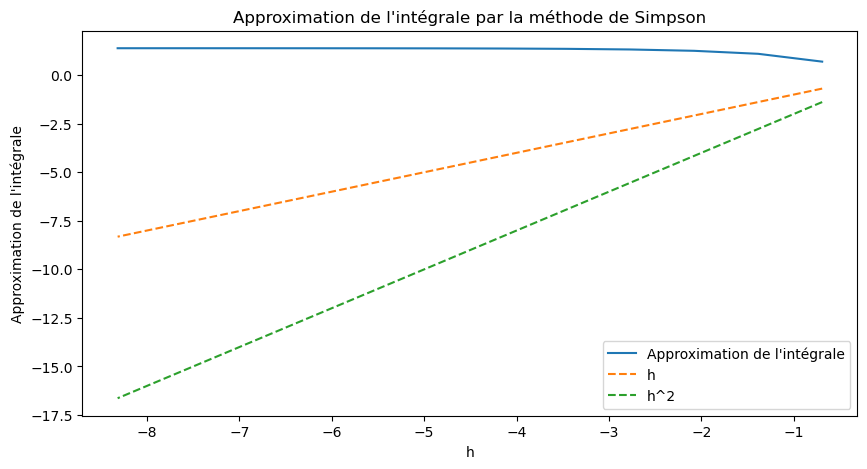

In [496]:
a, b = 0, 1
I2, h_list, errors2 = compute_I(f, a, b, m)

print(f"I2 = {I2}")

plt.figure(figsize=(10, 5))
plt.plot(np.log(h_list), np.log(errors2), label='Approximation de l\'intégrale')
plt.plot(np.log(h_list), np.log(h_list), '--', label='h')
plt.plot(np.log(h_list), 2*np.log(h_list), '--', label='h^2')
plt.xlabel('h')
plt.ylabel('Approximation de l\'intégrale')
plt.title('Approximation de l\'intégrale par la méthode de Simpson')
plt.legend()
plt.show()

L'erreur obtenue vient du fait que les premières valeurs de f pour un h très petit est trop proche de 0 donc l'approximation n'est pas possible.

# Question 2

In [518]:
def RKI(f, y0, vt, tol = 1e-6, itmax = 20):
	N, T = len(vt), vt[-1]
	yn = np.zeros((len(y0), N))
	yn[:, 0] = y0
	h = T / N

	for n in range(N-1):
		p1 = f(vt[n], yn[:, n])
		F1 = lambda p2: f(vt[n] + h/3, yn[:, n] + h/6 * (p1 + p2)) - p2
		p2 = newton(F1, yn[:, n], fprime=None, tol=tol, maxiter=itmax)
		F2 = lambda yn1: yn[:, n] + h/4 * (3 * p2 + f(vt[n+1], yn1)) - yn1
		yn[:, n + 1] = newton(F2, yn[:, n], fprime=None, tol=tol, maxiter=itmax)
	return yn

# Question 3

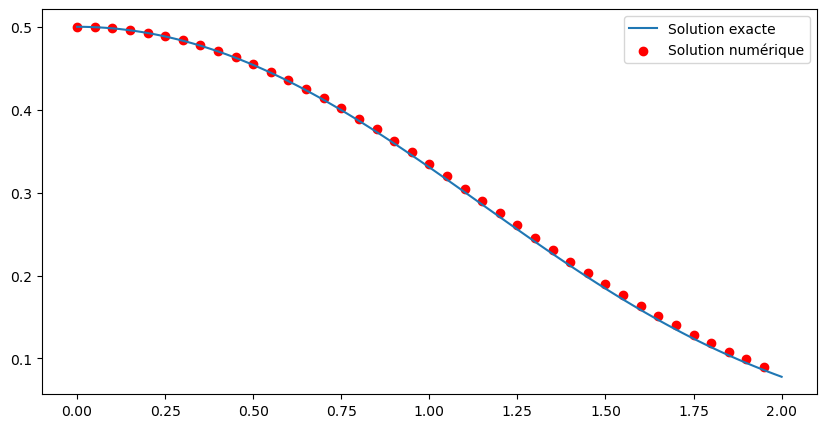

In [519]:
a, b = [0, 2]

def f(t, y):
	return t * np.power(y, 3) - t  * y
	
y0 = [0.5]

def sol_exact(t):
	return 1 / np.sqrt(1 + 3 * np.exp(np.power(t, 2)))

x = np.linspace(a, b, 100)

h = 0.05
vt = np.arange(a, b, h)
y = RKI(f, y0, vt)

plt.figure(figsize=(10, 5))
plt.plot(x, sol_exact(x), label='Solution exacte')
plt.scatter(vt, y, label='Solution numérique', color='red')
plt.legend()
plt.show()


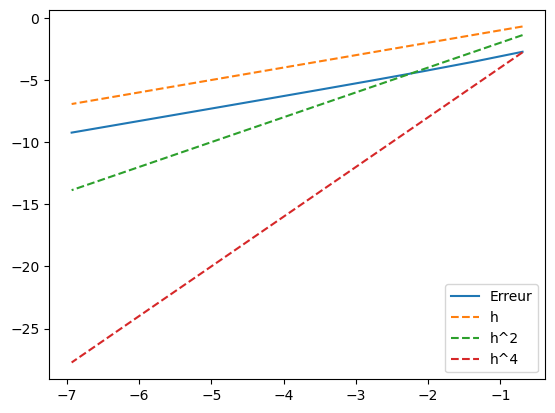

In [520]:
k = np.arange(1, 10 + 1)
h_list = 1/np.power(2, k)

errors = []
for h in h_list:
    vt = np.arange(a, b, h)
    y = RKI(f, y0, vt)
    errors.append(np.max(np.abs(y - sol_exact(vt))))
    
plt.plot(np.log(h_list), np.log(errors), label='Erreur')
plt.plot(np.log(h_list), np.log(h_list), '--', label='h')
plt.plot(np.log(h_list), 2*np.log(h_list), '--', label='h^2')
plt.plot(np.log(h_list), 4*np.log(h_list), '--', label='h^4')
plt.legend()
plt.show()

#### L'ordre de convergence de ce schéma est **1**

# Question 4

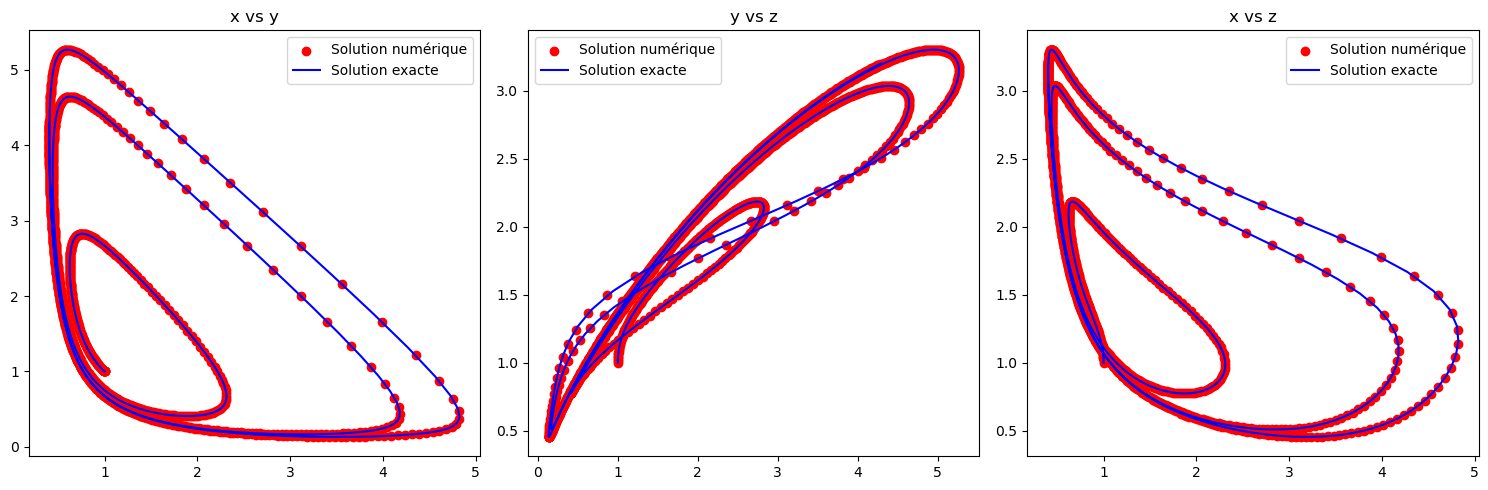

In [524]:
def F(t, Y):
    x, y, z = Y
    return np.array([
        1 + np.power(x, 2) * y - (z + 1) * x,
        x * z - np.power(x, 2) * y,
        - x * z + 1.45
    ])

h = 0.025
y0 = np.array([1, 1, 1])
t = np.arange(0, 40, h)

sol_exact = odeint(F, y0, t, tfirst=True)
y = RKI(F, y0, t)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(y[0], y[1], label='Solution numérique', color='red')
ax1.plot(sol_exact[:, 0], sol_exact[:, 1], label='Solution exacte', color='blue')
ax1.legend()
ax1.set_title('x vs y')

ax2.scatter(y[1], y[2], label='Solution numérique', color='red')
ax2.plot(sol_exact[:, 1], sol_exact[:, 2], label='Solution exacte', color='blue')
ax2.legend()
ax2.set_title('y vs z')

ax3.scatter(y[0], y[2], label='Solution numérique', color='red')
ax3.plot(sol_exact[:, 0], sol_exact[:, 2], label='Solution exacte', color='blue')
ax3.legend()
ax3.set_title('x vs z')

plt.tight_layout()
plt.show()

In [527]:
# Tracer dans le plan complexe le domaine de stabilité du schéma ci dessus (RKI)
